**Introdução à Ciência de Dados - Trabalho 03**

**Algoritmos de Aprendizagem de Máquina**

Sérgio Garcia Barbosa Filho - 493746

**Tema/Site utilizado:** Catálogo de personagens do jogo Bungo Stray Dogs - Tales of The Lost / Mayoi Inu Kaikitan (Mobile)

In [226]:
import pandas as pd
import plotly.express as px #plot dos gráficos com labels
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(12345)

**Escolhi abordar o algoritmo de Classificação Árvore de Decisão**

In [227]:
# Leitura do dataset
dataset = pd.read_csv('New - Bungo_Data.csv')
dataset

,rarity,type,hp_max,atk_max
0,UR,Support,10617,2594
1,SSR,Defensive,10482,1456
2,SR,Support,4511,1082
3,SSR,Special,8938,1526
4,SSR,Balanced,8272,1690
...,...,...,...,...
749,SSR,Offensive,6931,2005
750,SR,Defensive,5378,779
751,SR,Balanced,4754,963
752,SR,Offensive,4130,1206


In [228]:
# dividir o dataset em features (X) target (y)
X = dataset[['rarity', 'hp_max', 'atk_max']]
y = dataset['type']

#Converter as features categóricas para valores numéricos usando o one-hot enconding
X = pd.get_dummies(X)

#print(X)

# Dividir o dataset em conjuntos de teste e conjuntos de treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar a árvore de decisão
classifier = DecisionTreeClassifier()

# Realização do treino do classificador - melhorando o algoritmo:
classifier.fit(X_train, y_train)

# Predizer o tipo
y_pred = classifier.predict(X_test)

#print(y_pred, len(y_pred))

# verificar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.9668874172185431


**Visualização da aplicação do algoritmo:**

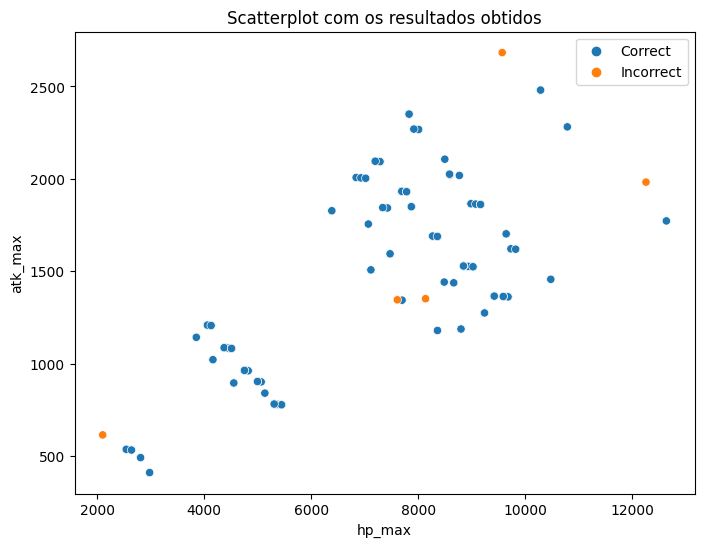

In [229]:
# Plot da árvore de decisão:
plt.figure(figsize=(120, 80))
plot_tree(classifier, filled=True, rounded=True, feature_names=X.columns.tolist())
plt.title("Decision Tree")
plt.show()

# Gerar um dataframe com os resultados previstos e o conjunto de valores de teste:
results = pd.DataFrame({'True': y_test, 'Predicted': y_pred})

# Adicionar ao dataframe uma coluna para indicar se o resultado calculado está correto ou não:
results['Correct'] = np.where(results['True'] == results['Predicted'], 'Correct', 'Incorrect')

# Create a scatter plot to visualize the groups with correct and incorrect predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hp_max', y='atk_max', hue='Correct', data=X_test.join(results))
plt.title("Scatterplot com os resultados obtidos")
plt.xlabel("hp_max")
plt.ylabel("atk_max")
plt.legend()
plt.show()



**Gráficos com os dados do dataset completo (real)**

In [230]:
fig = px.scatter(dataset, x = 'hp_max', y='atk_max', color = 'rarity', width=700, height=700)
fig.show()

In [231]:
fig = px.scatter(dataset, x = 'hp_max', y='atk_max', color = 'type', width=700, height=700)
fig.show()